In [1]:
import scanpy as sc


In [ ]:
# read ST data

adata = sc.read_h5ad("/data/SpatialFusion-main/Data/visium_hne.h5ad")
adata.var_names_make_unique()

In [ ]:
from SpatialFusion import SpatialFusion
# preprocessing for ST data
SpatialFusion.preprocess(adata)

# build graph
# GraphST.construct_interaction(adata)
SpatialFusion.add_contrastive_label(adata)

/root/anaconda3/envs/env_cp39_deepst/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [4]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap', 'spatial', 'label_CSL'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
# read scRNA data
file_path="/data/SpatialFusion-main/Data/mouse_visual_cortexSC.h5ad"
adata_sc = sc.read(file_path)
adata_sc.var_names_make_unique()

/root/anaconda3/envs/env_cp39_deepst/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
SpatialFusion.preprocess(adata_sc)

/root/anaconda3/envs/env_cp39_deepst/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [ ]:
# find overlap genes
from SpatialFusion.preprocess import filter_with_overlap_gene
adata, adata_sc = filter_with_overlap_gene(adata, adata_sc)

Number of overlap genes: 472


/data/SpatialFusion-main/GraphST/preprocess.py:36: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["overlap_genes"] = genes
/data/SpatialFusion-main/GraphST/preprocess.py:37: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata_sc.uns["overlap_genes"] = genes


In [ ]:
import torch
# Run device, by default, the package is implemented on 'cpu'. We recommend using GPU.
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

# Train model
model = SpatialFusion.SpatialFusion(adata, adata_sc, epochs=1200, random_seed=273, device=device, deconvolution=True)
adata, adata_sc = model.train_map()

Begin to train ST data...


  0%|          | 0/1200 [00:00<?, ?it/s]/root/anaconda3/envs/env_cp39_deepst/lib/python3.9/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/data/SpatialFusion-main/GraphST/model.py:74: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.alpha = F.softmax(torch.squeeze(self.vu) + 1e-6)
100%|██████████| 1200/1200 [00:36<00:00, 33.08it/s]


Optimization finished for ST data!
Begin to train scRNA data...


100%|██████████| 1200/1200 [00:15<00:00, 78.65it/s]


Optimization finished for cell representation learning!
Begin to learn mapping matrix...


100%|██████████| 1200/1200 [01:10<00:00, 17.03it/s]


Mapping matrix learning finished!


In [ ]:
from SpatialFusion.utils import project_cell_to_spot
project_cell_to_spot(adata, adata_sc, retain_percent=0.15)

In [10]:
adata

AnnData object with n_obs × n_vars = 2688 × 472
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster', 'Astro', 'Endo_1', 'Endo_2', 'ExcL23', 'ExcL4', 'ExcL5_1', 'ExcL5_2', 'ExcL5_3', 'ExcL6', 'Hip', 'Int_Cck', 'Int_Npy', 'Int_Pv', 'Int_Sst_1', 'Int_Sst_2', 'Int_Vip', 'Macrophage', 'Micro_1', 'Micro_2', 'OPC_1', 'OPC_2', 'Olig_1', 'Olig_2', 'Olig_3', 'Olig_4', 'Olig_5', 'Olig_6', 'Olig_7', 'Pericyte', 'RSP', 'SM_1', 'SM_2', 'Sub', 'nan'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_no

In [11]:
# Get cell type column names
cell_type_cols = ['Astro', 'Endo_1', 'Endo_2', 'ExcL23', 'ExcL4', 'ExcL5_1', 'ExcL5_2', 'ExcL5_3',
                  'ExcL6', 'Hip', 'Int_Cck', 'Int_Npy', 'Int_Pv', 'Int_Sst_1', 'Int_Sst_2', 'Int_Vip',
                  'Macrophage', 'Micro_1', 'Micro_2', 'OPC_1', 'OPC_2', 'Olig_1', 'Olig_2', 'Olig_3',
                  'Olig_4', 'Olig_5', 'Olig_6', 'Olig_7', 'Pericyte', 'RSP', 'SM_1', 'SM_2', 'Sub']

# Assign a cell type to each cell, based on the maximum value across cell type columns
adata.obs['cell_type'] = adata.obs[cell_type_cols].idxmax(axis=1)


In [12]:
len(cell_type_cols)

33

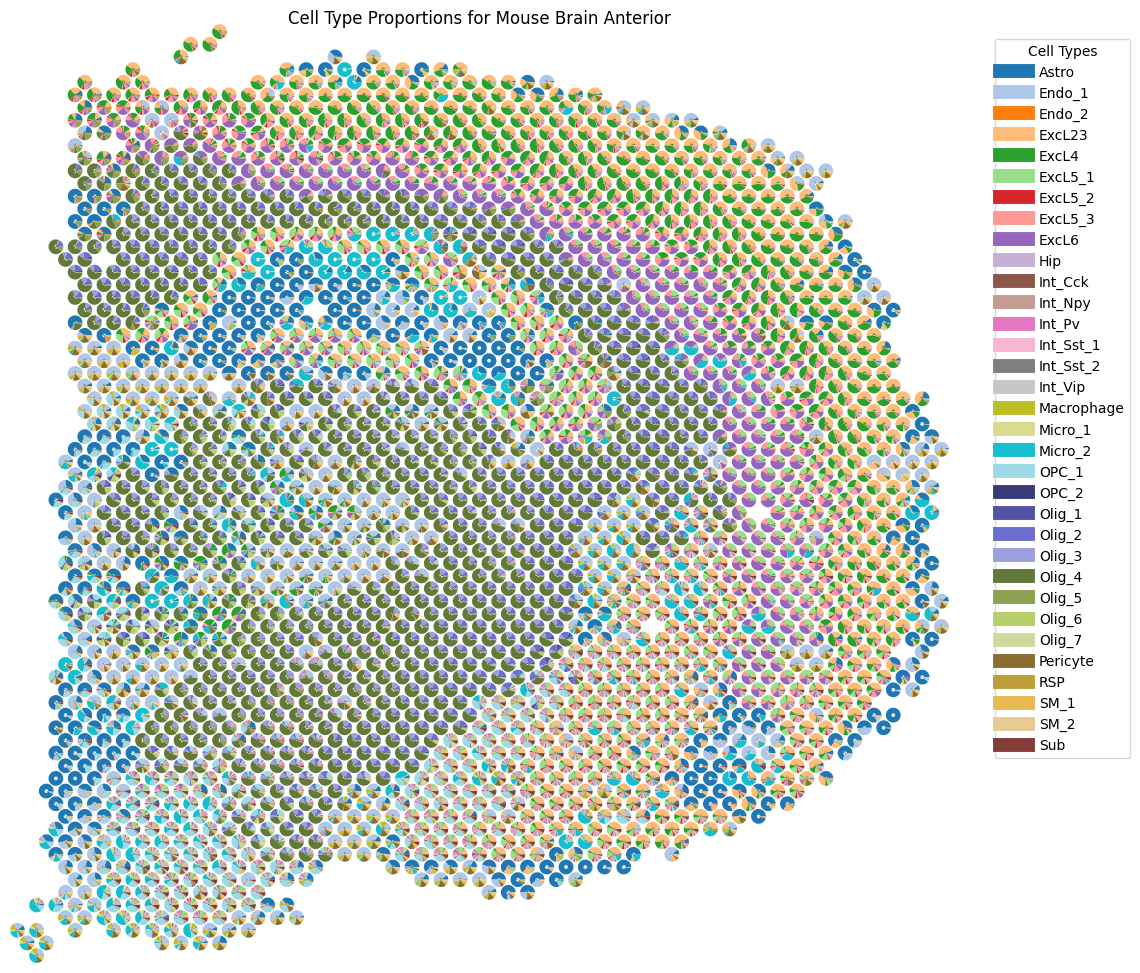

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import chain

# Convert domain to string if needed

# Select only the specified domains for visualization
# selected_domains = ['4', '8', '9', '12', '16']
adata_filtered = adata
# Get row and column coordinates from adata.obs
x_coords = adata_filtered.obs['array_col'].values  # using 'array_col' for X-axis
y_coords = adata_filtered.obs['array_row'].values  # using 'array_row' for Y-axis

# Extract cell type columns from adata.obs and ensure they are numeric
cell_types = cell_type_cols

# Convert cell type columns to numeric and fill NaNs with zeros
adata_filtered.obs[cell_types] = adata_filtered.obs[cell_types].apply(pd.to_numeric, errors='coerce').fillna(0)

# Normalize cell type proportions for each observation
adata_filtered.obs[cell_types] = adata_filtered.obs[cell_types].div(
    adata_filtered.obs[cell_types].sum(axis=1), axis=0
)

# Get spatial coordinates for plotting
x_coords = (x_coords - x_coords.min()) / (x_coords.max() - x_coords.min()) * 100
y_coords = (y_coords - y_coords.min()) / (y_coords.max() - y_coords.min()) * 100*(-1)

# Set up the plot with a fixed figure size
fig, ax = plt.subplots(figsize=(12, 12))

# Define color map for cell types
colormaps = ['tab20', 'tab20b', 'tab20c']
colors_list = list(chain.from_iterable(plt.get_cmap(cmap).colors for cmap in colormaps))
cell_type_colors = colors_list[:len(cell_types)]
# colors = plt.cm.get_cmap('tab20', len(cell_types))
# cell_type_colors = [colors(i) for i in range(len(cell_types))]

# Plot each spot as a solid pie chart
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    proportions = adata_filtered.obs.iloc[i][cell_types].values
    
    # Skip spots with no cell type proportions
    if np.sum(proportions) == 0:
        continue

    # Define the pie chart parameters with solid slices
    ax.pie(
        proportions,
        center=(x, y),
        radius=0.8,  # Adjust the radius of the pie chart
        colors=cell_type_colors,
        wedgeprops=dict(width=1.0)  # Make the pie chart solid
    )

# Add a legend for cell types
handles = [plt.Line2D([0], [0], color=color, lw=10, label=cell_type) for color, cell_type in zip(cell_type_colors, cell_types)]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Cell Types')

# Remove axis and frame
ax.set_frame_on(False)
ax.set_axis_off()
ax.invert_yaxis()

# Set plot limits to match the scaled coordinates
ax.set_xlim(0, 100)
ax.set_ylim(-100, 0)

# Add title
plt.title("Cell Type Proportions for Mouse Brain Anterior")

# Display the result
plt.show()